### **DATASET OVERVIEW**

**Customer Churn Dataset** describes about the customers of ABC Multistate bank.  
Dataset source: [**Link**](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset).  
Dataset details:
1. **customer_id**
2. **credit_score**
3. **country**
4. **gender**
5. **age**
6. **tenure**
7. **balance**
8. **products_number**
9. **credit_card**
10. **active_member**
11. **estimated_salary**
12. **churn**: used as target, 1 if the client has left the bank during some period or 0 if they have not.

### **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, normaltest, chi2_contingency

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

### **READ DATA**

In [2]:
data = pd.read_csv("churn.csv")

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


> Based on the data information above:
> - The **Churn Dataset** contains 10000 observations.
> - The dataset has no missing values, hence performing further .
> - The dataset contains 11 features and 1 target variable (churn).

In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> The data description above shows the statistical summary of all the columns, including the target variable (churn).  
> The statistical summary shows that the data is imbalanced, since the 75% of data is still 0, and the mean is around 0.20.  
> Additionally, since the *customer_id* column doesn't infer any significant information, so I will drop the column.

In [6]:
data.drop("customer_id", axis = 1, inplace = True)

### **EDA & PREPROCESSING**

In [7]:
data.duplicated().sum()

0

> Since there are no duplicated values, additional handling is unnecessary.

In [8]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

> As mentioned before, there are no missing values in the data.  
> As an anticipation, below here I displayed all the unique values in the data to confirm that there are no blank values.

In [9]:
for i in data.columns:
    print(data[i].unique(), "\n")

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

> Hence, it is confirmed that there are no missing values, so I won't be performing any handling methods.

In [10]:
train_df, test_df = train_test_split(data, test_size = 0.2, stratify = data["churn"], random_state = 7)

print("Train and test data splitted.")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train and test data splitted.
Train shape: (8000, 11)
Test shape: (2000, 11)


> In the code above, I performed splitting data into train and test sets (80:20). This is intended to prevent data leakage, hence I will perform data exploration only on the training sets, in order to ensure that the test data remains "untouched", as it represents a new data.

In [11]:
cardinal = pd.DataFrame({
    "column name": train_df.columns.tolist(),
    "data type": [train_df[c].dtype for c in train_df.columns],
    "unique values": [train_df[c].nunique() for c in train_df.columns]
})
print("Cardinality Check Result:")
cardinal

Cardinality Check Result:


,column name,data type,unique values
0,credit_score,int64,457
1,country,object,3
2,gender,object,2
3,age,int64,70
4,tenure,int64,11
5,balance,float64,5090
6,products_number,int64,4
7,credit_card,int64,2
8,active_member,int64,2
9,estimated_salary,float64,8000


In [12]:
categoricals = ["country", "gender", "products_number", "credit_card", "active_member"]
numericals = ["credit_score", "age", "tenure", "balance", "estimated_salary"]
target = ["churn"]

print(f"Categorical Columns: {categoricals}")
print(f"Numerical Columns: {numericals}")

Categorical Columns: ['country', 'gender', 'products_number', 'credit_card', 'active_member']
Numerical Columns: ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']


> I divided the column types into categorical and numerical to ease exploration steps.

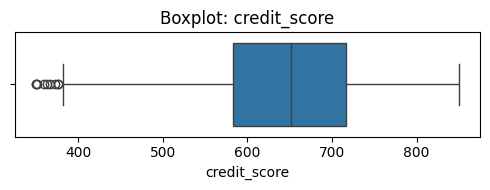

D’Agostino K² Statistic: 112.02263014609214, p-value: 4.727101631564057e-25


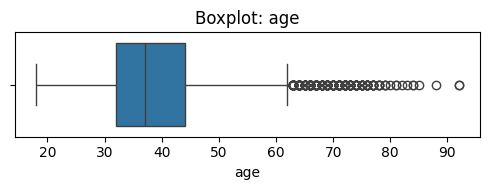

D’Agostino K² Statistic: 1219.2212780959226, p-value: 1.7760833867396758e-265


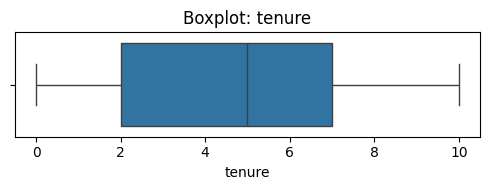

D’Agostino K² Statistic: 5074.716753762087, p-value: 0.0


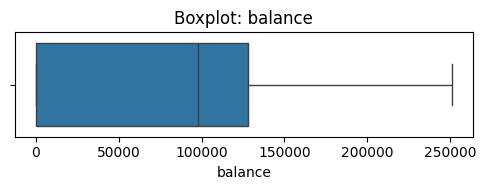

D’Agostino K² Statistic: 49277.475007779176, p-value: 0.0


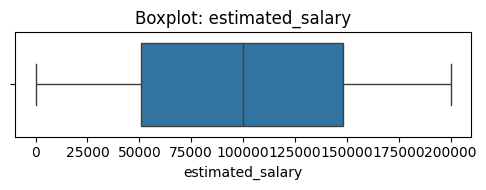

D’Agostino K² Statistic: 5315.131157089363, p-value: 0.0


In [13]:
def dist_outliers(df, columns) :
    for i in columns :
        plt.figure(figsize = (5, 2))
        sns.boxplot(x = df[i])
        plt.title(f"Boxplot: {i}")

        plt.tight_layout()
        plt.show()

        stat, p = normaltest(df[i])
        print(f"D’Agostino K² Statistic: {stat}, p-value: {p}")

dist_outliers(train_df[numericals], numericals)

> The output above shows the distribution and outlier checking on the numerical columns.  
> - **tenure**, **balance**, and **estimated_salary** have no outliers.
> - **credit_score** and **age** have several outliers, but the outliers makes sense to be occurring in real life, hence I won't be performing any outlier handling here.
> - All of the numerical features are not normally distributed, this will be a consideration for the other exploration and preprocessing steps.

### **DATA VISUALIZATION**

<Figure size 500x500 with 0 Axes>

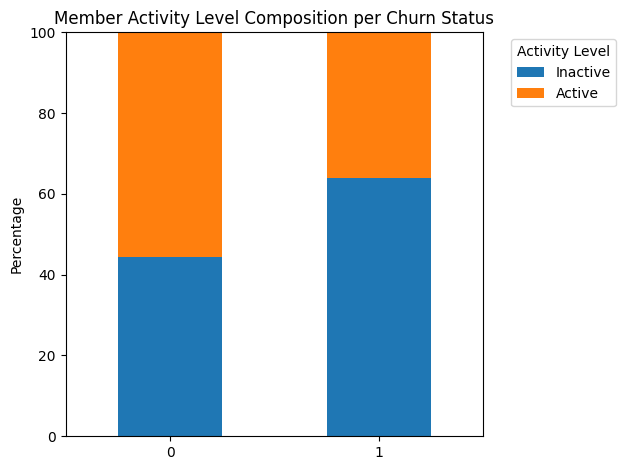

In [14]:
plt.figure(figsize=(5, 5))

vis_1 = train_df.value_counts(["churn", "active_member"]).\
    unstack()
percentage_table_1 = vis_1.\
    div(vis_1.sum(axis = 1), 
        axis = 0) * 100
percentage_table_1.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Member Activity Level Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Activity Level", 
           labels = ["Inactive", "Active"],
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Inactive members are more likely to churn than the active class, but there's also active member who churns.

<Figure size 500x500 with 0 Axes>

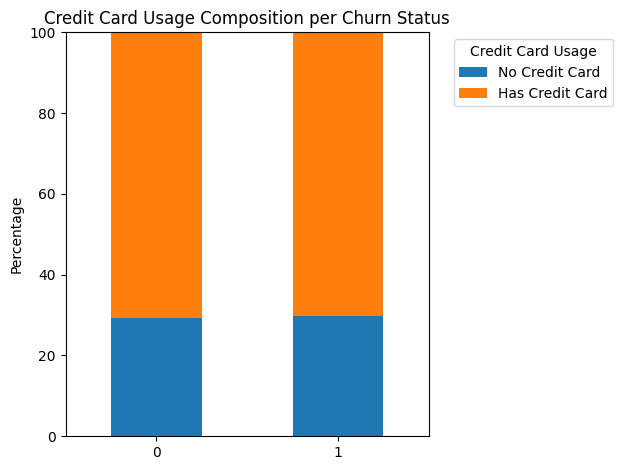

In [15]:
plt.figure(figsize=(5, 5))

vis_2 = train_df.value_counts(["churn", "credit_card"]).\
    unstack()
percentage_table_2 = vis_2.\
    div(vis_2.sum(axis = 1), 
        axis = 0) * 100
percentage_table_2.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Credit Card Usage Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Credit Card Usage", 
           labels = ["No Credit Card", "Has Credit Card"],
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Credit card usage doesn't really impact the churn status, as the percentages are similar.

<Figure size 500x500 with 0 Axes>

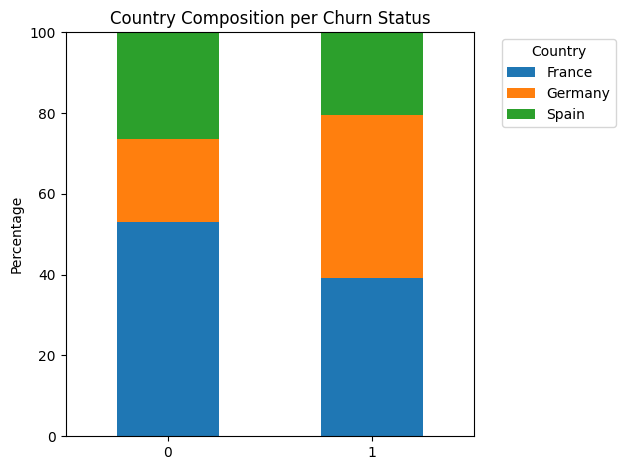

In [16]:
plt.figure(figsize=(5, 5))

vis_3 = train_df.value_counts(["churn", "country"]).\
    unstack()
percentage_table_3 = vis_3.\
    div(vis_3.sum(axis = 1), 
        axis = 0) * 100
percentage_table_3.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Country Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Country", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Germany have higher churn rates than those from Spain and France.

<Figure size 500x500 with 0 Axes>

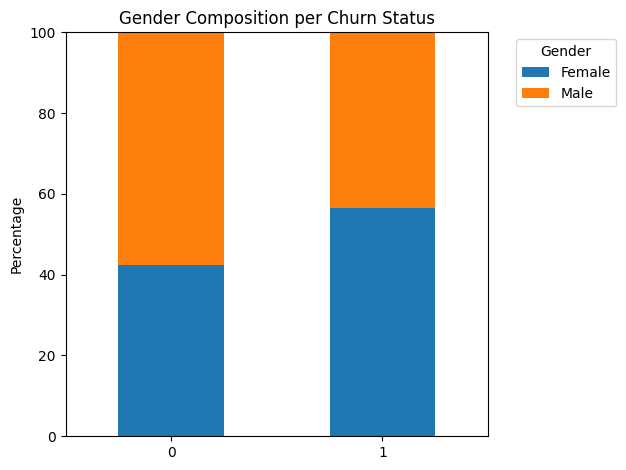

In [17]:
plt.figure(figsize=(5, 5))

vis_4 = train_df.value_counts(["churn", "gender"]).\
    unstack()
percentage_table_4 = vis_4.\
    div(vis_4.sum(axis = 1), 
        axis = 0) * 100
percentage_table_4.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Gender Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Gender", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, females are slightly more likely to churn than males.

<Figure size 500x500 with 0 Axes>

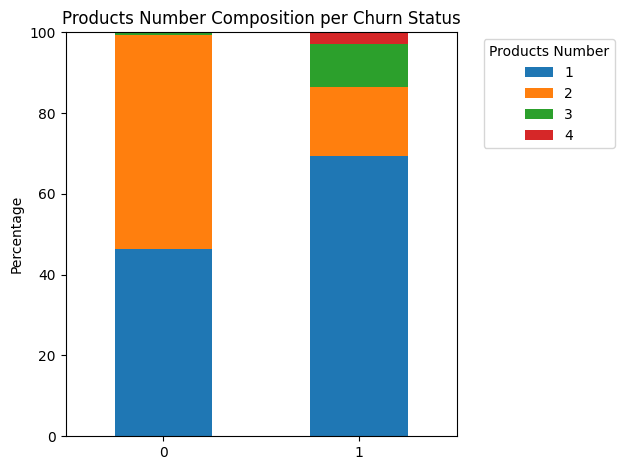

In [18]:
plt.figure(figsize=(5, 5))

vis_5 = train_df.value_counts(["churn", "products_number"]).\
    unstack()
percentage_table_5 = vis_5.\
    div(vis_5.sum(axis = 1), 
        axis = 0) * 100
percentage_table_5.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Products Number Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Products Number", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

In [19]:
print(f"Percentage of customer with product number 4 churning: {(((train_df['products_number'] == 4) & (train_df['churn'] == 1)).sum() / (train_df['products_number'] == 4).sum() * 100):.0f}%")

Percentage of customer with product number 4 churning: 100%


> The probability of all customers churning after using product number 4 is 100%, which means that this might cause data leakage, causing the model to be deterministic by always predicting churn for product number 4.  
> To determine whether the model will be dependent on this feature, I will be flagging it for further clarification.

In [20]:
churn_ratio = train_df.groupby("products_number")["churn"].mean()
always_churn = churn_ratio[churn_ratio == 1].index.tolist()
train_df["churn_always_flag"] = train_df["products_number"].isin(always_churn).astype(int)

> Since the data are mostly not-normal in terms of their distribution, I will use Mann-Whitney U Test for all the numeric features.

### **IDENTIFY CORRELATION**

In [21]:
yvar = "churn"
for col in numericals:
    temp = train_df[[col, yvar]].dropna()
    groups = temp.groupby(yvar)[col].apply(list)
    g1 = groups.loc[0]
    g2 = groups.loc[1]
    stat, p = mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"{col:20s} | U-stat: {stat:10.4f} | p-value: {p:8.4f}")

credit_score         | U-stat: 5450789.0000 | p-value:   0.0018
age                  | U-stat: 2764911.0000 | p-value:   0.0000
tenure               | U-stat: 5346261.0000 | p-value:   0.0617
balance              | U-stat: 4341011.5000 | p-value:   0.0000
estimated_salary     | U-stat: 5147056.0000 | p-value:   0.5928


> Based on the U test, the significant features to churn (target) are **credit_score**, **age**, and **balance**, with p-value < 0.05. 

In [22]:
for col in categoricals:
    temp = train_df[[col, yvar]].dropna()
    crosstab = pd.crosstab(temp[col], temp[yvar])
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col:20s} | Chi2-stat: {stat:9.4f} | p-value: {p:8.4f}")

country              | Chi2-stat:  264.2877 | p-value:   0.0000
gender               | Chi2-stat:  103.1205 | p-value:   0.0000
products_number      | Chi2-stat: 1166.4203 | p-value:   0.0000
credit_card          | Chi2-stat:    0.0445 | p-value:   0.8329
active_member        | Chi2-stat:  195.5826 | p-value:   0.0000


> Based on the Chisquared test performed on the categorical data, the significant features to churn (target) are **country**, **gender**, **products_number**, and **active_member**, with p-value < 0.05. 

> Here, I have determined the possible significant features to predict churn, but I will still keep the features to confirm the feature importances later.

### **ENCODING**

In [23]:
for i in train_df[categoricals].columns:
    print(f"{i}:\n{train_df[i].unique()}")

country:
['France' 'Germany' 'Spain']
gender:
['Female' 'Male']
products_number:
[1 2 3 4]
credit_card:
[1 0]
active_member:
[0 1]


> Based on the output above:
> - **country** and **products_number** are nominal categorical data, they don't really infer order. Hence, I will perform one hot encoding for thes features.  
> - **gender** is a binary categorical data, consisting of only Male and Female. I will perform binary mapping for this feature.
> - **credit_card** and **active_member** are also binary categorical data, but they are already in the numeric form, so I won't be performing any encoding.

In [24]:
one_hot = OneHotEncoder(handle_unknown = 'ignore')
one_hot.fit(train_df[["country", "products_number"]])

train_enc = pd.DataFrame(
    one_hot.transform(train_df[["country", "products_number"]]).toarray(),
    columns = one_hot.get_feature_names_out(["country", "products_number"]),
    index = train_df.index
).astype(int)

test_enc = pd.DataFrame(
    one_hot.transform(test_df[["country", "products_number"]]).toarray(),
    columns = one_hot.get_feature_names_out(["country", "products_number"]),
    index = test_df.index
).astype(int)

In [25]:
train_df = pd.concat([train_df.reset_index(drop = True), train_enc.reset_index(drop = True)], axis = 1)
test_df = pd.concat([test_df.reset_index(drop = True), test_enc.reset_index(drop = True)], axis = 1)

In [26]:
train_df.drop(columns = ["country", "products_number"], inplace = True)
test_df.drop(columns = ["country", "products_number"], inplace = True)

In [27]:
binary_enc = {"gender": {"Male": 1, 
                         "Female": 0}}

train_df = train_df.replace(binary_enc)
test_df = test_df.replace(binary_enc)

C:\Users\Marcelline\AppData\Local\Temp\ipykernel_20180\440087081.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.replace(binary_enc)
C:\Users\Marcelline\AppData\Local\Temp\ipykernel_20180\440087081.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df = test_df.replace(binary_enc)


In [28]:
train_df

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,churn_always_flag,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4
0,779,0,41,10,99786.20,1,0,86927.53,0,0,1,0,0,1,0,0,0
1,614,1,32,7,99462.80,1,1,51117.06,0,0,0,1,0,0,1,0,0
2,679,1,40,1,0.00,1,1,16897.19,0,0,1,0,0,1,0,0,0
3,742,1,33,1,137937.95,1,1,51387.10,0,0,0,1,0,1,0,0,0
4,800,0,38,2,168190.33,1,0,68052.08,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,648,0,56,6,157559.59,1,0,140991.23,1,0,0,0,1,0,1,0,0
7996,807,1,47,1,95120.59,0,0,127875.10,0,0,1,0,0,1,0,0,0
7997,646,0,33,2,0.00,0,0,198208.00,0,0,1,0,0,0,1,0,0
7998,588,0,21,8,0.00,1,1,110114.19,0,0,1,0,0,0,1,0,0


### **SCALING**

In [29]:
train_df[numericals].describe()

,credit_score,age,tenure,balance,estimated_salary
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,649.482500,38.966250,5.01250,76548.849119,99649.751685
std,96.535893,10.483802,2.89679,62599.959401,57209.359111
min,350.000000,18.000000,0.00000,0.000000,11.580000
25%,583.000000,32.000000,2.00000,0.000000,50895.310000
50%,651.000000,37.000000,5.00000,97729.660000,99867.870000
75%,717.000000,44.000000,7.00000,127827.332500,148315.227500
max,850.000000,92.000000,10.00000,250898.090000,199992.480000


> Now, we have different magnitudes for the numerical columns, such as **credit_score** (350-850), **age** (18-92), **balance** (0-250898.09), and **estimated_salary** (11.58-199992.48). These significant differences can cause the model to be "biased" towards some features, and it is not desirable.  
> Considering that the numerical columns are not normally distributed, I will perform PowerTransformer to "Gaussianize" them then perform Standard Scaling to scale them based on the mean and standard deviation.

In [30]:
power = PowerTransformer(method = "yeo-johnson")
train_df[numericals] = power.fit_transform(train_df[numericals])
test_df[numericals] = power.transform(test_df[numericals])

In [31]:
scaler = StandardScaler()
train_df[numericals] = scaler.fit_transform(train_df[numericals])
test_df[numericals] = scaler.transform(test_df[numericals])

In [32]:
train_df.describe()

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,churn_always_flag,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4
count,8.000000e+03,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000,8.000000e+03,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-8.881784e-18,0.547000,-2.486900e-17,-2.819966e-17,5.084821e-17,0.705500,0.516125,8.881784e-18,0.20375,0.006000,0.501500,0.247000,0.251500,0.510500,0.456375,0.027125,0.006000
std,1.000063e+00,0.497817,1.000063e+00,1.000063e+00,1.000063e+00,0.455846,0.499771,1.000063e+00,0.40281,0.077232,0.500029,0.431294,0.433902,0.499921,0.498124,0.162458,0.077232
min,-3.023291e+00,0.000000,-3.108669e+00,-1.922387e+00,-1.318799e+00,0.000000,0.000000,-2.194366e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.939232e-01,0.000000,-6.173603e-01,-1.024891e+00,-1.318799e+00,0.000000,0.000000,-7.757505e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.560196e-03,1.000000,-3.913232e-02,6.287076e-02,6.891650e-01,1.000000,1.000000,1.015421e-01,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.960966e-01,1.000000,6.249241e-01,7.082309e-01,7.867580e-01,1.000000,1.000000,8.503542e-01,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2.104142e+00,1.000000,3.149789e+00,1.604630e+00,1.049125e+00,1.000000,1.000000,1.574252e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> The data has been transformed to have the same magnitude, and is ready for modeling.

### **SPLIT TO X AND Y**

In [33]:
x_train = train_df[train_df.columns.drop(["churn"])]
y_train = train_df["churn"]
x_test = test_df[test_df.columns.drop(["churn"])]
y_test = test_df["churn"]


print(f"Train shape: {x_train.shape} | {y_train.shape}")
print(f"Test shape: {x_test.shape} | {y_test.shape}")

Train shape: (8000, 16) | (8000,)
Test shape: (2000, 15) | (2000,)


### **MODELING**

#### **LOGISTIC REGRESSION**
> Model justification: one of the fundamental model and commonly used models for binary classification.

In [34]:
model_1 = LogisticRegression(solver = "liblinear", max_iter = 200, random_state = 7)
model_1.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=7, solver='liblinear')

In [35]:
importance_1 = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": model_1.coef_[0],
    "Abs(Coefficient)": abs(model_1.coef_[0])
}).sort_values(by = "Abs(Coefficient)", ascending = False)

display(importance_1)

,Feature,Coefficient,Abs(Coefficient)
13,products_number_2,-2.260420,2.260420
8,churn_always_flag,1.715110,1.715110
15,products_number_4,1.715110,1.715110
14,products_number_3,1.550930,1.550930
6,active_member,-1.076732,1.076732
2,age,0.883940,0.883940
10,country_Germany,0.769712,0.769712
12,products_number_1,-0.712354,0.712354
1,gender,-0.536326,0.536326
9,country_France,-0.280046,0.280046


> Based on the feature importances on the Logistic Regression model above, it's known that the **products_number_4** (along with the flag **churn_always_flag**) has high influence on the model, making it "deterministic" rather than "prediction". So, I will exclude them for the real prediction later.

#### **RANDOM FOREST**
> Model justification: RF is a powerful ensemble learning algorithm that combines the prediction of multiple trees. As it is widely regarded as a robust model for both classification and regression, it is a strong benchmark to evaluate the churn prediction problem.

In [36]:
model_2 = RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 10, criterion = "gini", random_state = 7)
model_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=10,
                       random_state=7)

In [37]:
importance_2 = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": model_2.feature_importances_,
    "Normalized (%)": 100 * (model_2.feature_importances_ / model_2.feature_importances_.sum())
}).sort_values(by = "Importance", ascending = False)

display(importance_2)

,Feature,Importance,Normalized (%)
2,age,0.303244,30.324450
13,products_number_2,0.110425,11.042478
4,balance,0.106423,10.642273
14,products_number_3,0.075911,7.591145
6,active_member,0.074611,7.461091
0,credit_score,0.070225,7.022524
7,estimated_salary,0.066651,6.665148
12,products_number_1,0.049677,4.967712
10,country_Germany,0.045341,4.534099
3,tenure,0.030881,3.088140


> As different models has different feature importances, the products_number_4 (along with the flag) is not really significant to the model. So, I will consider to keep it as the feature for later prediction and evaluation.

#### **SUPPORT VECTOR MACHINE**
> Model justification: SVM is known as one of the fundamental algorithms for binary classification too, as it aims to find the optimal hyperplane that maximizes the margin between the classes. This property makes it a strong candidate for comparison with Logistic Regression, particularly when the relationship between the features are not linear.

In [38]:
model_3 = SVC(kernel = "rbf")
model_3.fit(x_train.drop(columns = "churn_always_flag"), y_train)

SVC()

> Since SVM doesn't really have the method to extract feature importance if the kernel is not linear, I will be using PFI as an agnostic based model to identify the feature importances.

In [39]:
result = permutation_importance(model_3, x_test, y_test, n_repeats = 10, random_state = 7)
importance_3 = pd.DataFrame({
    "Feature": x_test.columns,
    "Importance": result.importances_mean
}).sort_values(by = "Importance", ascending = False)
display(importance_3)

,Feature,Importance
12,products_number_2,0.07130
2,age,0.06140
6,active_member,0.03105
11,products_number_1,0.03070
4,balance,0.00895
13,products_number_3,0.00820
7,estimated_salary,0.00550
0,credit_score,0.00335
1,gender,0.00240
9,country_Germany,0.00235


> Just like on the second model, the products_number_4 is not really significant to the model. So, I will consider to keep it as the feature for later prediction and evaluation.

### **PREDICTION AND EVALUATION**

> After evaluating the feature importances across the three models, only the top 50% features will be retained. This threshold balances dimensionality reduction with model performance to ensure that the retained features capture the most influential predictors.

In [40]:
top_n_1 = int(len(importance_1) * 0.5)
top_n_2 = int(len(importance_2) * 0.5)
top_n_3 = int(len(importance_3) * 0.5)

In [41]:
importance_1 = importance_1[importance_1["Feature"] != "churn_always_flag"]
importance_2 = importance_2[importance_2["Feature"] != "churn_always_flag"]
importance_3 = importance_3[importance_3["Feature"] != "churn_always_flag"]

selected_features_1 = importance_1.head(top_n_1)["Feature"].tolist()
selected_features_2 = importance_2.head(top_n_2)["Feature"].tolist()
selected_features_3 = importance_3.head(top_n_3)["Feature"].tolist()

In [42]:
x_train_selected_1 = x_train[selected_features_1]
x_train_selected_2 = x_train[selected_features_2]
x_train_selected_3 = x_train[selected_features_3]
x_test_selected_1 = x_test[selected_features_1]
x_test_selected_2 = x_test[selected_features_2]
x_test_selected_3 = x_test[selected_features_3]

      Predicted  Actual
0             0       0
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
1995          0       0
1996          0       0
1997          0       0
1998          0       0
1999          0       0

[2000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.41      0.52       407

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



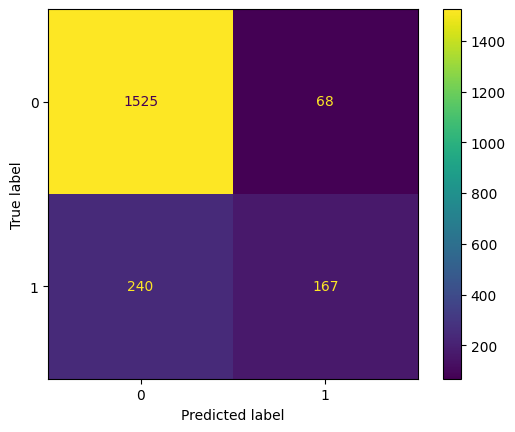

In [43]:
model_1_ = LogisticRegression(solver = "liblinear", max_iter = 200, random_state = 7)
model_1_.fit(x_train_selected_1, y_train)

y_pred_1 = model_1_.predict(x_test_selected_1)

pred_df_1 = pd.DataFrame(y_pred_1, columns = ["Predicted"])
actual_df_1 = pd.DataFrame({"Actual": y_test.values})

comparison_1 = pd.concat([pred_df_1, actual_df_1], axis = 1)
print(comparison_1)

print(classification_report(y_test, y_pred_1))

cm_1 = confusion_matrix(y_test, y_pred_1, labels = [0,1])
cm_plot_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = model_1_.classes_)
cm_plot_1.plot()

> Based on the classification report above, the macro-averaged precision score is 0.79, indicating that approximately 79% of the predicted positives are truly positive, which is not a bad result.
> Meanwhile, the macro-averaged recall score is 0.68, suggesting that out of all actual positives, the model can only predict 68% of them correctly.  
> As a result, the macro-averaged F1-Score of 0.71 reflects a balanced yet moderate trade-off between the precision and recall.
> Overall, the model demonstrates decent predictive capability but still misses a portion of true churn cases, which may be critical in a business context.
> In addition to the conclusion above, when we look at the confusion matrix plot, it supports the findings by showing the distribution of true and predicted labels across both classes.

      Predicted  Actual
0             0       0
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
1995          0       0
1996          0       0
1997          0       0
1998          0       0
1999          0       0

[2000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



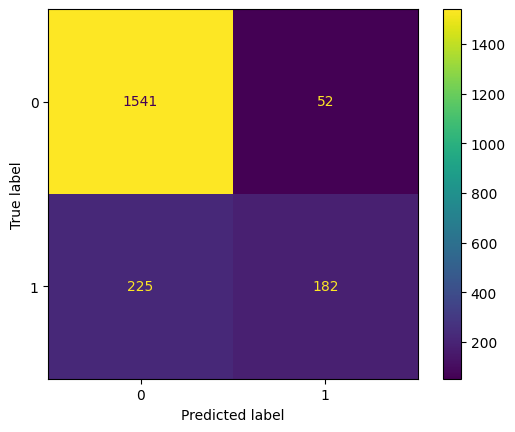

In [44]:
model_2_ = RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 10, criterion = "gini", random_state = 7)
model_2_.fit(x_train_selected_2, y_train)

y_pred_2 = model_2_.predict(x_test_selected_2)

pred_df_2 = pd.DataFrame(y_pred_2, columns = ["Predicted"])
actual_df_2 = pd.DataFrame({"Actual": y_test.values})

comparison_2 = pd.concat([pred_df_2, actual_df_2], axis = 1)
print(comparison_2)

print(classification_report(y_test, y_pred_2))

cm_2 = confusion_matrix(y_test, y_pred_2, labels = [0,1])
cm_plot_2 = ConfusionMatrixDisplay(confusion_matrix = cm_2, display_labels = model_2_.classes_)
cm_plot_2.plot()

> Based on the classification report above, the macro-averaged precision score is 0.83, showing an improved performance compared to the Logistic Regression model.
> Additionally, the macro-averaged recall score is also higher, which is 0.71.  
> As a result, the macro-averaged F1-Score of 0.74 reflects a more balanced trade-off between the precision and recall.
> Overall, the model demonstrates a stronger predictive capability than the previous model but still misses a portion of true churn cases.
> In addition to the conclusion above, when we look at the confusion matrix plot, it supports the findings by showing the distribution of true and predicted labels across both classes.

      Predicted  Actual
0             0       0
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
1995          0       0
1996          0       0
1997          0       0
1998          0       0
1999          0       0

[2000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.84      0.41      0.55       407

    accuracy                           0.86      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



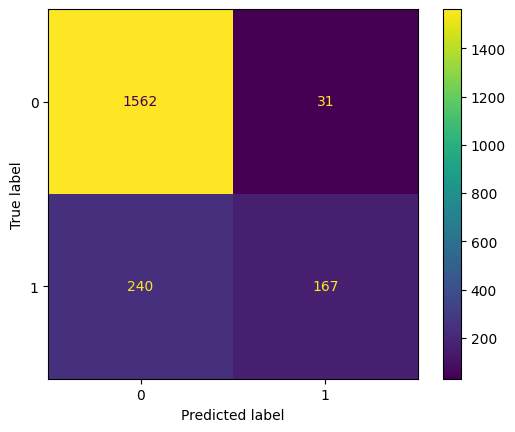

In [45]:
model_3_ = SVC(kernel = "rbf")
model_3_.fit(x_train_selected_3, y_train)

y_pred_3 = model_3_.predict(x_test_selected_3)

pred_df_3 = pd.DataFrame(y_pred_3, columns = ["Predicted"])
actual_df_3 = pd.DataFrame({"Actual": y_test.values})

comparison3 = pd.concat([pred_df_3, actual_df_3], axis = 1)
print(comparison3)

print(classification_report(y_test, y_pred_3))

cm_3 = confusion_matrix(y_test, y_pred_3, labels = [0,1])
cm_plot_3 = ConfusionMatrixDisplay(confusion_matrix = cm_3, display_labels = model_3_.classes_)
cm_plot_3.plot()

> Based on the classification report above, the macro-averaged precision score is 0.86, showing a better performance than the previous models.
> However, the macro-averaged recall score is slightly weaker than the Random Forest model, but still outperforms the Logistic Regression model.
> As a result, the macro-averaged F1-Score of 0.74 reflects a balanced trade-off between the precision and recall.
> Overall, the model demonstrates a better predictive capability than the previous model but still misses a portion of true churn cases.
> In addition to the conclusion above, when we look at the confusion matrix plot, it supports the findings by showing the distribution of true and predicted labels across both classes.

#### **ADDITIONAL COMPARISON PLOT: ROC AUC**

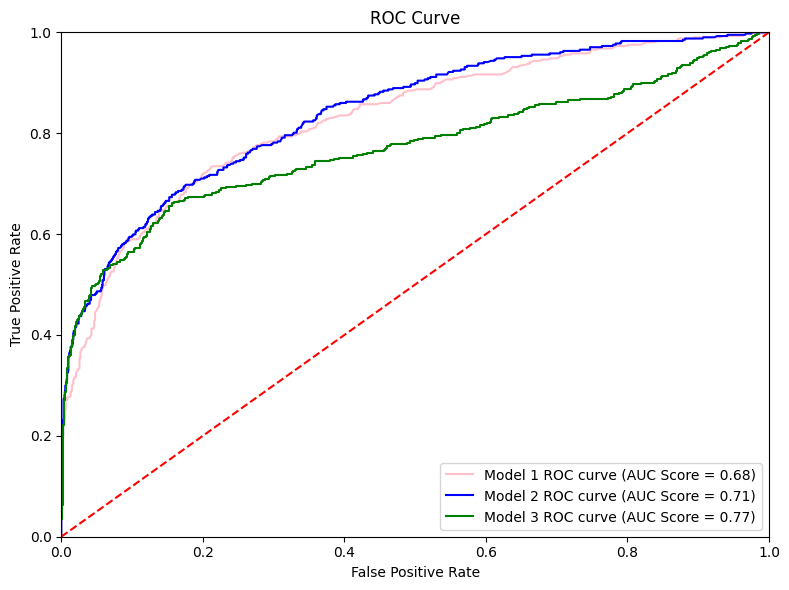

In [46]:
y_prob_1 = model_1_.predict_proba(x_test_selected_1)[:, 1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_prob_1)
roc_auc_1 = roc_auc_score(y_test, y_pred_1)

y_prob_2 = model_2_.predict_proba(x_test_selected_2)[:, 1]
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_prob_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_2)

y_prob_3 = model_3_.decision_function(x_test_selected_3)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_prob_3)
roc_auc_3 = auc(fpr_3, tpr_3)

plt.figure(figsize = (8, 6))

plt.plot(fpr_1, tpr_1, color = "pink", label = f"Model 1 ROC curve (AUC Score = {roc_auc_1:.2f})")
plt.plot(fpr_2, tpr_2, color = "blue", label = f"Model 2 ROC curve (AUC Score = {roc_auc_2:.2f})")
plt.plot(fpr_3, tpr_3, color = "green", label = f"Model 3 ROC curve (AUC Score = {roc_auc_3:.2f})")
plt.plot([0, 1], [0, 1], color = "red", linestyle = "--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = "lower right")

plt.tight_layout()
plt.show()

> Based on the ROC curve above, along with the results of evaluating the model with classification report, it can be concluded that model 3 (SVM) performs the best.

### **HYPERPARAMETER FINE TUNING**

> To improve the SVC model’s performance, hyperparameter fine-tuning was performed since the baseline model used only the default parameters.

In [49]:
hyparameters = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": [0.1, 1, 10, 50, 100],    
    "gamma": ["scale", "auto"],
    "degree": [3, 4]
}

In [52]:
grid_search = GridSearchCV(estimator = model_3_, 
                           param_grid = hyparameters,
                           scoring = "f1", 
                           cv = 7, 
                           n_jobs = -1, 
                           verbose = 2)

grid_search.fit(x_train, y_train)

print("Best parameter : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 7 folds for each of 60 candidates, totalling 420 fits
Best parameter :  {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best score :  0.5562779948455792


### **TEST FINE-TUNED MODEL**

      Predicted  Actual
0             0       0
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
1995          0       0
1996          0       0
1997          0       0
1998          0       0
1999          0       0

[2000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.85      0.41      0.55       407

    accuracy                           0.86      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



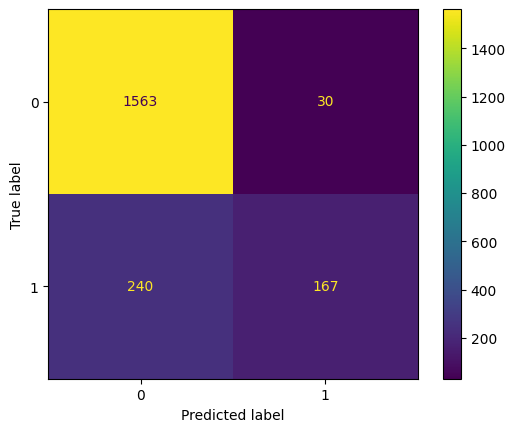

In [53]:
model_3_ft = SVC(kernel = "rbf",
                 C = 100,
                 degree = 3,
                 gamma = "auto")
model_3_ft.fit(x_train_selected_3, y_train)

y_pred_3 = model_3_ft.predict(x_test_selected_3)

pred_df_3 = pd.DataFrame(y_pred_3, columns = ["Predicted"])
actual_df_3 = pd.DataFrame({"Actual": y_test.values})

comparison3 = pd.concat([pred_df_3, actual_df_3], axis = 1)
print(comparison3)

print(classification_report(y_test, y_pred_3))

cm_3 = confusion_matrix(y_test, y_pred_3, labels = [0,1])
cm_plot_3 = ConfusionMatrixDisplay(confusion_matrix = cm_3, display_labels = model_3_ft.classes_)
cm_plot_3.plot()

> After fine-tuning, the macro-averaged precision, recall, and F1-score remained comparable to the baseline. This suggests that the baseline configuration was already near-optimal. However, the fine-tuned model was retained as the final selected model since it maintains performance consistency across folds while benefiting from systematic preprocessing and validated hyperparameters.